# Indonesia Corona Virus Daily Case Visualization
### Oleh: Putu Andika Tedja Permana (180030302)

In [ ]:
# Libraries for Google Colab
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
from google.colab import drive

In [1]:
# Libraries for Offline Notebooks
import pandas as pd 
import matplotlib.pyplot as plt
import datetime

In [ ]:
# Mount Google Drive for Google Colab
drive.mount('/content/drive')

# Exploratory Data Analysis (EDA)

In [ ]:
# Google Colab
corona_df = pd.read_csv('/content/drive/MyDrive/STIKOM/Semester VI/Data Visualization/Visualization/Indonesia_coronavirus_daily_data.csv')

In [20]:
# Jupyter Notebook Offline
corona_df = pd.read_csv('Indonesia_coronavirus_daily_data.csv')

In [21]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    12316 non-null  object
 1   Province                12316 non-null  object
 2   Daily_Case              12316 non-null  int64 
 3   Daily_Death             12316 non-null  int64 
 4   Daily_Recovered         12316 non-null  int64 
 5   Active_Case             12316 non-null  int64 
 6   Cumulative_Case         12316 non-null  int64 
 7   Cumulative_Recovered    12316 non-null  int64 
 8   Cumulative_Death        12316 non-null  int64 
 9   Cumulative_Active_Case  12316 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 962.3+ KB


In [22]:
corona_df.describe()

,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,117.692108,3.084768,102.475723,12.131617,12090.240013,9822.938373,375.984573,1891.317067
std,326.195884,8.722982,308.099449,155.470942,32810.283818,28879.752554,1001.546578,4494.660836
min,0.000000,0.000000,0.000000,-3437.000000,1.000000,0.000000,0.000000,-743.000000
25%,4.000000,0.000000,1.000000,-5.000000,321.000000,178.000000,8.000000,103.000000
50%,26.000000,0.000000,15.000000,2.000000,2773.000000,1743.000000,77.000000,583.000000
75%,88.000000,2.000000,71.000000,23.000000,9380.000000,7043.750000,305.250000,1755.250000
max,4601.000000,163.000000,5636.000000,2263.000000,366520.000000,352767.000000,9142.000000,49520.000000


In [23]:
corona_df.shape

(12316, 10)

In [24]:
corona_df.head(5)

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,01/03/2020,DKI JAKARTA,2,0,0,2,2,0,0,2
1,02/03/2020,DKI JAKARTA,2,0,0,2,4,0,0,4
2,03/03/2020,DKI JAKARTA,2,0,0,2,6,0,0,6
3,04/03/2020,DKI JAKARTA,2,0,0,2,8,0,0,8
4,05/03/2020,DKI JAKARTA,0,1,0,-1,8,0,1,7


In [25]:
corona_df.isnull().sum()

Date                      0
Province                  0
Daily_Case                0
Daily_Death               0
Daily_Recovered           0
Active_Case               0
Cumulative_Case           0
Cumulative_Recovered      0
Cumulative_Death          0
Cumulative_Active_Case    0
dtype: int64

In [26]:
corona_df['Province'].nunique()

34

In [27]:
corona_df.tail(5)

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
12311,15/03/2021,NUSA TENGGARA TIMUR,83,0,9,74,10796,8365,298,2133
12312,16/03/2021,NUSA TENGGARA TIMUR,193,9,57,127,10989,8422,307,2260
12313,17/03/2021,NUSA TENGGARA TIMUR,220,7,35,178,11209,8457,314,2438
12314,18/03/2021,NUSA TENGGARA TIMUR,167,0,175,-8,11376,8632,314,2430
12315,19/03/2021,NUSA TENGGARA TIMUR,96,0,0,96,11472,8632,314,2526


# Data Preprocessing

## Membuat dataframe untuk total kasus, sembuh, kematian,  dan rasio per provinsi

In [3]:
total_per_province = corona_df.groupby('Province')[['Daily_Case','Daily_Recovered', 'Daily_Death']].sum().reset_index().rename(columns={
    'Daily_Case': 'Total_Case',
    'Daily_Recovered': 'Total_Recovered',
    'Daily_Death': 'Total_Death',
})

# Membuat Kolom Rasio Kematian terhadap Kasus
total_per_province['Death_Case_Ratio'] = total_per_province['Total_Death'] / total_per_province['Total_Case'] * 100

# Membuat Kolom Rasio Sembuh terhadap Kasus
total_per_province['Recovered_Case_Ratio'] = total_per_province['Total_Recovered'] / total_per_province['Total_Case'] * 100

total_per_province

,Province,Total_Case,Total_Recovered,Total_Death,Death_Case_Ratio,Recovered_Case_Ratio
0,ACEH,9728,7971,387,3.978207,81.938734
1,BALI,37656,32655,923,2.451137,86.719248
2,BANTEN,34098,26149,605,1.774298,76.687782
3,BENGKULU,5232,4807,151,2.886086,91.876911
4,DAERAH ISTIMEWA YOGYAKARTA,31100,25207,746,2.398714,81.051447
5,DKI JAKARTA,366520,352767,6136,1.674124,96.247681
6,GORONTALO,5020,4687,141,2.808765,93.366534
7,JAMBI,5867,4709,82,1.397648,80.262485
8,JAWA BARAT,238604,203829,2850,1.194448,85.425642
9,JAWA TENGAH,164060,117526,6618,4.033890,71.635987


## Membuat dataframe pertumbuhan kasus per bulan

In [4]:
# Membuat kolom baru 'Month'
corona_df['Month'] = corona_df['Date'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime('%Y-%m'))
corona_df

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case,Month
0,01/03/2020,DKI JAKARTA,2,0,0,2,2,0,0,2,2020-03
1,02/03/2020,DKI JAKARTA,2,0,0,2,4,0,0,4,2020-03
2,03/03/2020,DKI JAKARTA,2,0,0,2,6,0,0,6,2020-03
3,04/03/2020,DKI JAKARTA,2,0,0,2,8,0,0,8,2020-03
4,05/03/2020,DKI JAKARTA,0,1,0,-1,8,0,1,7,2020-03
...,...,...,...,...,...,...,...,...,...,...,...
12311,15/03/2021,NUSA TENGGARA TIMUR,83,0,9,74,10796,8365,298,2133,2021-03
12312,16/03/2021,NUSA TENGGARA TIMUR,193,9,57,127,10989,8422,307,2260,2021-03
12313,17/03/2021,NUSA TENGGARA TIMUR,220,7,35,178,11209,8457,314,2438,2021-03
12314,18/03/2021,NUSA TENGGARA TIMUR,167,0,175,-8,11376,8632,314,2430,2021-03


In [5]:
total_cases_per_month = corona_df.groupby('Month')['Daily_Case'].sum().reset_index(name='Total_Case')
total_cases_per_month['Cumulative'] = total_cases_per_month['Total_Case'].cumsum()
total_cases_per_month

,Month,Total_Case,Cumulative
0,2020-03,943,943
1,2020-04,8478,9421
2,2020-05,16220,25641
3,2020-06,29621,55262
4,2020-07,52033,107295
5,2020-08,66448,173743
6,2020-09,112312,286055
7,2020-10,123327,409382
8,2020-11,128889,538271
9,2020-12,204542,742813


# Visualization

## Visualisasi total kasus setiap provinsi

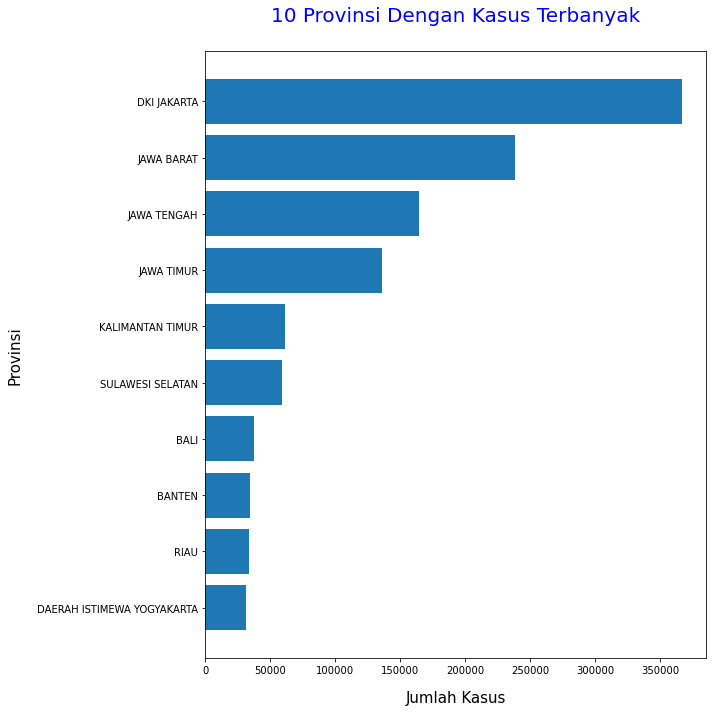

In [19]:
top_10_case = total_per_province.sort_values('Total_Case', ascending=True).tail(10)

plt.figure(figsize=(10,10))
plt.barh(top_10_case['Province'], top_10_case['Total_Case'])
plt.title('10 Provinsi Dengan Kasus Terbanyak', pad=30, fontsize=20, color='blue')
plt.xlabel('Jumlah Kasus', fontsize=15, labelpad=15)
plt.ylabel('Provinsi', fontsize=15, labelpad=15)
plt.tight_layout()
plt.savefig('10_prov_kasus.jpg')
plt.show()

## Visualisasi 10 Provinsi Dengan Rasio Kematian Tertinggi

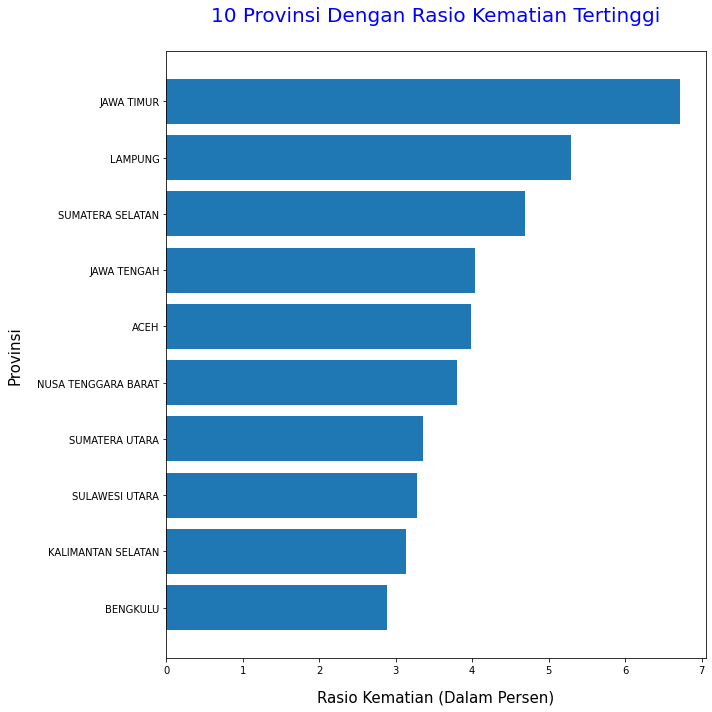

In [18]:
death_ratio = total_per_province.sort_values('Death_Case_Ratio', ascending=True).tail(10)

plt.figure(figsize=(10,10))
plt.barh(death_ratio['Province'], death_ratio['Death_Case_Ratio'])
plt.title('10 Provinsi Dengan Rasio Kematian Tertinggi', pad=30, fontsize=20, color='blue')
plt.xlabel('Rasio Kematian (Dalam Persen)', fontsize=15, labelpad=15)
plt.ylabel('Provinsi', fontsize=15, labelpad=15)
plt.tight_layout()
plt.savefig('10_prov_kematian.jpg')
plt.show()

## Visualisasi 10 Provinsi Dengan Rasio Sembuh Rendah

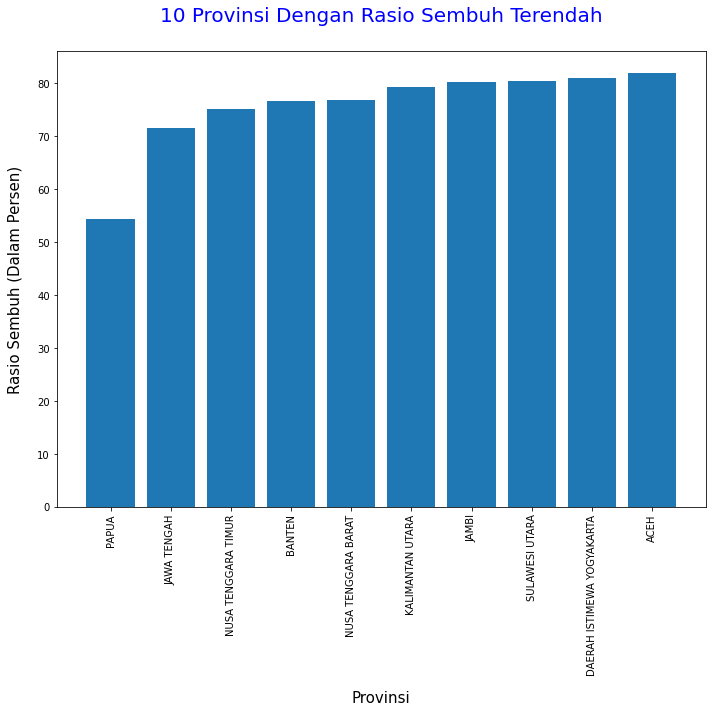

In [17]:
recovered_ratio = total_per_province.sort_values('Recovered_Case_Ratio', ascending=True).head(10)

plt.figure(figsize=(10,10))
plt.bar(recovered_ratio['Province'], recovered_ratio['Recovered_Case_Ratio'])
plt.title('10 Provinsi Dengan Rasio Sembuh Terendah', pad=30, fontsize=20, color='blue')
plt.xlabel('Provinsi', fontsize=15, labelpad=15)
plt.xticks(rotation=90)
plt.ylabel('Rasio Sembuh (Dalam Persen)', fontsize=15, labelpad=15)
plt.tight_layout()
plt.savefig('10_prov_sembuh.jpg')
plt.show()

## Visualisasi Penambahan Total Kasus Per Bulan

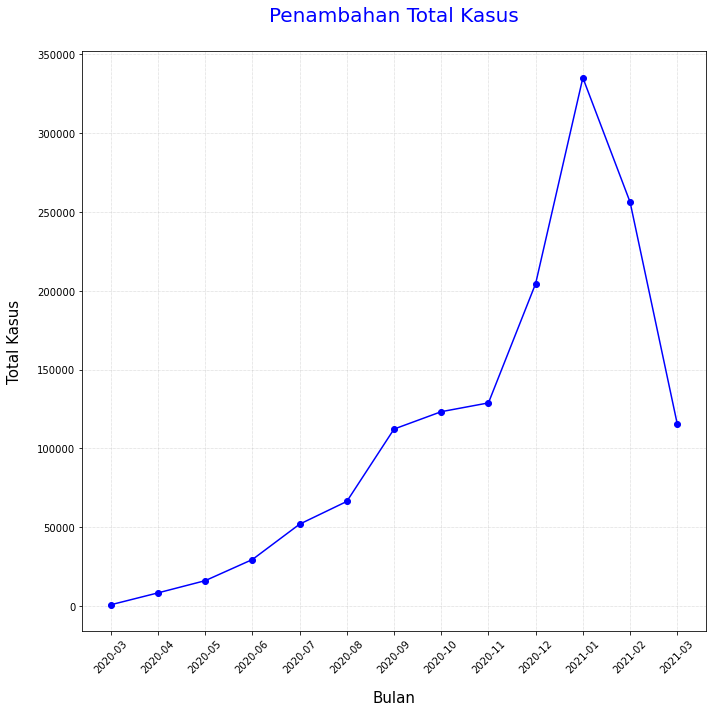

In [13]:
plt.figure(figsize=(10,10))
plt.plot(total_cases_per_month['Month'], total_cases_per_month['Total_Case'], 'bo-')
plt.title('Penambahan Total Kasus', pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize=15, labelpad=15)
plt.ylabel('Total Kasus', fontsize=15, labelpad=15)
plt.xticks(rotation=45)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.savefig('10_prov_kasus_tambah.jpg')
plt.show()

## Visualisasi Pertumbuhan Total Kasus Setiap Bulan

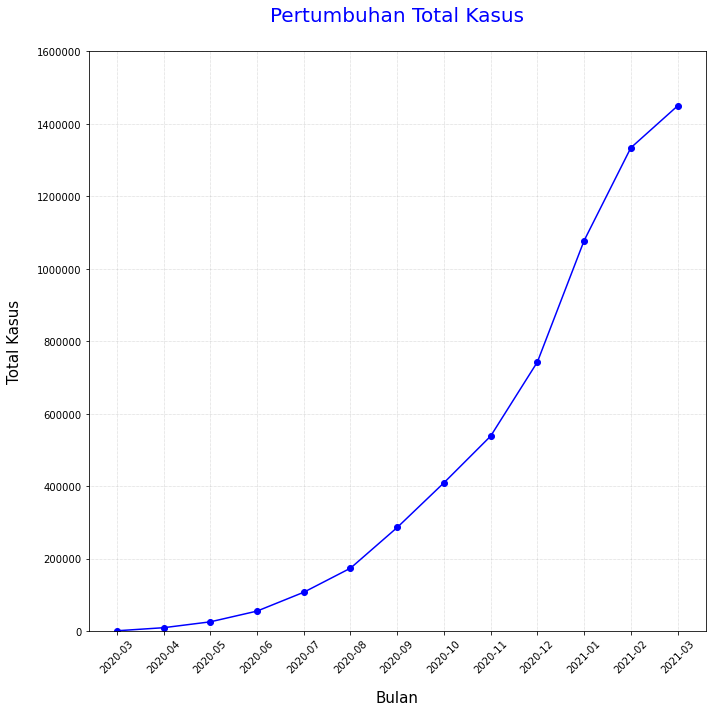

In [12]:
plt.figure(figsize=(10,10))
plt.plot(total_cases_per_month['Month'], total_cases_per_month['Cumulative'], 'bo-')
plt.title('Pertumbuhan Total Kasus', pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize=15, labelpad=15)
plt.ylabel('Total Kasus', fontsize=15, labelpad=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, labels.astype(int))
plt.ylim(0)
plt.tight_layout()
plt.savefig('10_prov_kasus_tumbuh.jpg')
plt.show()